In [1]:
import matplotlib.pyplot as plt
import re
import cv2

In [2]:
def readFile (path):
    with open(path) as file:
        data = file.read()
    return data;

In [3]:
data = readFile ("Data/textFiles/tokens.txt")

captions = data.split('\n')
captions = captions[:-1]

In [4]:
print("Total number of caption = " + str(len(captions)))

Total number of caption = 40460


In [5]:
content = {}
i=0
for line in captions:

    imageID, caption = line.split('\t')

    imageID = imageID.split('.')[0]
    if i==0:
      print(imageID)
      i+=1
    if content.get(imageID) is None:
        content[imageID] = []

    content[imageID].append(caption)

1000268201_693b08cb0e


In [6]:
print(content[captions[0].split('.')[0]])

['A child in a pink dress is climbing up a set of stairs in an entry way .', 'A girl going into a wooden building .', 'A little girl climbing into a wooden playhouse .', 'A little girl climbing the stairs to her playhouse .', 'A little girl in a pink dress going into a wooden cabin .']


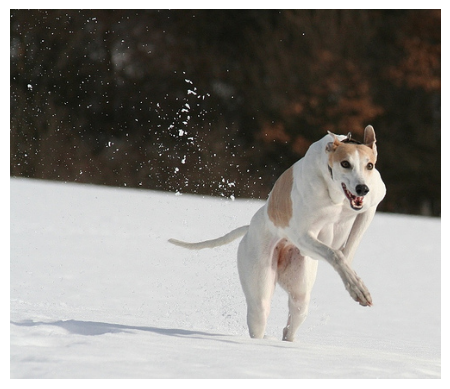

CAPTIONS - 
A brown and white dog is running through the snow .
A dog is running in the snow
A dog running through snow .
a white and brown dog is running through a snow covered field .
The white and brown dog is running over the surface of the snow .


In [7]:
IMG_PATH = "FLICKER/Images/"
image_id = captions[50].split('.')[0]
img = cv2.imread(IMG_PATH + image_id + ".jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

print("CAPTIONS - ")
for caption in content[image_id]:
    print(caption)

In [8]:
def clean (data):
    data = data.lower()

    data = re.sub("[^a-z]+", " ", data)

    return data

In [9]:
for ID, caption_list in content.items():
    for i in range(len(caption_list)):
        content[ID][i] = clean(content[ID][i])

In [10]:
print(content[captions[50].split('.')[0]][-1])

the white and brown dog is running over the surface of the snow 


In [11]:
with open ("Data/textFiles/tokens_clean.txt", "w") as file:
    file.write(str(content))

In [12]:
import json

content = None

with open ("Data/textFiles/tokens_clean.txt", 'r') as file:
    content = file.read()

json_acceptable_string = content.replace("'", "\"")
content = json.loads(json_acceptable_string)

In [13]:
total_words = []

for key in content.keys():
    for caption in content[key]:
        for i in caption.split():
            total_words.append(i)

print("Total Words = %d" %len(total_words))

Total Words = 437466


In [14]:
import collections

counter = collections.Counter(total_words)
freq_cnt = dict(counter)

print("Number of unique words = " + str(len(freq_cnt.keys())))

Number of unique words = 8441


In [15]:
sorted_freq_cnt = sorted(freq_cnt.items(), reverse=True, key=lambda x:x[1])

In [16]:
threshold = 5

sorted_freq_cnt = [x for x in sorted_freq_cnt if x[1]>threshold]
total_words = [x[0] for x in sorted_freq_cnt]

print("Number of common unique words = " + str(len(total_words)))

Number of common unique words = 2644


In [17]:
train_file_data = ""
test_file_data = ""

with open ("Data/textFiles/trainImages.txt", 'r') as file:
    train_file_data = file.read()

with open ("Data/textFiles/testImages.txt", 'r') as file:
    test_file_data = file.read()

In [18]:
train_file_data

'2513260012_03d33305cf.jpg\n2903617548_d3e38d7f88.jpg\n3338291921_fe7ae0c8f8.jpg\n488416045_1c6d903fe0.jpg\n2644326817_8f45080b87.jpg\n218342358_1755a9cce1.jpg\n2501968935_02f2cd8079.jpg\n2699342860_5288e203ea.jpg\n2638369467_8fc251595b.jpg\n2926786902_815a99a154.jpg\n2851304910_b5721199bc.jpg\n3423802527_94bd2b23b0.jpg\n3356369156_074750c6cc.jpg\n2294598473_40637b5c04.jpg\n1191338263_a4fa073154.jpg\n2380765956_6313d8cae3.jpg\n3197891333_b1b0fd1702.jpg\n3119887967_271a097464.jpg\n2276499757_b44dc6f8ce.jpg\n2506892928_7e79bec613.jpg\n2187222896_c206d63396.jpg\n2826769554_85c90864c9.jpg\n3097196395_ec06075389.jpg\n3603116579_4a28a932e2.jpg\n3339263085_6db9fd0981.jpg\n2532262109_87429a2cae.jpg\n2076906555_c20dc082db.jpg\n2502007071_82a8c639cf.jpg\n3113769557_9edbb8275c.jpg\n3325974730_3ee192e4ff.jpg\n1655781989_b15ab4cbff.jpg\n1662261486_db967930de.jpg\n2410562803_56ec09f41c.jpg\n2469498117_b4543e1460.jpg\n69710415_5c2bfb1058.jpg\n3414734842_beb543f400.jpg\n3006217970_90b42e6b27.jpg\n2192

In [19]:
train_data = [img_file_name for img_file_name in train_file_data.split("\n")[:-1]]
test_data = [img_file_name for img_file_name in test_file_data.split("\n")[:-1]]

In [20]:
train_data[:5]

['2513260012_03d33305cf.jpg',
 '2903617548_d3e38d7f88.jpg',
 '3338291921_fe7ae0c8f8.jpg',
 '488416045_1c6d903fe0.jpg',
 '2644326817_8f45080b87.jpg']

In [21]:
train_data = [image.split(".")[0] for image in train_data]
test_data = [image.split(".")[0] for image in test_data]

In [22]:
train_data[:5]

['2513260012_03d33305cf',
 '2903617548_d3e38d7f88',
 '3338291921_fe7ae0c8f8',
 '488416045_1c6d903fe0',
 '2644326817_8f45080b87']

In [23]:
train_content = {}

for imageID in train_data:
    train_content[imageID] = []
    for caption in content[imageID]:
        cap_to_append = "startseq " + caption + " endseq"
        train_content[imageID].append(cap_to_append)

###Transfer Learning

In [24]:
import tensorflow as tf


In [25]:
model = tf.keras.applications.efficientnet_v2.EfficientNetV2B3(include_top = False)
model.trainable = False

In [26]:
inputs = tf.keras.layers.Input(shape = (224,224,3),name = 'input_layer')
x = model(inputs)
outputs = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
new_model = tf.keras.Model(inputs,outputs)

In [27]:
from keras.preprocessing import image
import numpy as np

def preprocess_image (img):
    img = tf.keras.utils.load_img(img, target_size=(224, 224))
    img = tf.keras.utils.img_to_array(img)

    img = np.expand_dims(img, axis=0)

    img = tf.keras.applications.efficientnet.preprocess_input(img)

    return img

In [28]:
def encode_image (img):
    img = preprocess_image(img)
    feature_vector = new_model.predict(img)
    feature_vector = feature_vector.reshape((-1,))
    return feature_vector

In [29]:
image_path = "FLICKER/Images/1001773457_577c3a7d70.jpg"
enc = encode_image(image_path)
print(len(enc))

2023-11-06 09:20:18.898715: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 1s 950ms/step
1536


In [30]:
from time import time

train_encoding = {}

start_time = time()
for index, imageID in enumerate (train_data):
    image_path = "FLICKER/Images/" + imageID + ".jpg"

    train_encoding[imageID] = encode_image(image_path)

    if index%100 == 0:
        print("Encoding in progress... STEP", index)

end_time = time()
print("Total time taken:", end_time-start_time, "sec")

1/1 [==============================] - 0s 48ms/step
Encoding in progress... STEP 0
1/1 [==============================] - 0s 46ms/step
Encoding in progress... STEP 100
1/1 [==============================] - 0s 44ms/step
Encoding in progress... STEP 200
1/1 [==============================] - 0s 45ms/step
Encoding in progress... STEP 300
1/1 [==============================] - 0s 44ms/step
Encoding in progress... STEP 400
1/1 [==============================] - 0s 45ms/step
Encoding in progress... STEP 500
1/1 [==============================] - 0s 43ms/step
Encoding in progress... STEP 600
1/1 [==============================] - 0s 43ms/step
Encoding in progress... STEP 700
1/1 [==============================] - 0s 43ms/step
Encoding in progress... STEP 800
1/1 [==============================] - 0s 42ms/step
Encoding in progress... STEP 900
1/1 [==============================] - 0s 42ms/step
Encoding in progress... STEP 1000
1/1 [==============================] - 0s 43ms/step
Encoding in pr

In [31]:
import pickle

with open("Data/textFiles/encoded_train_features_effnet.pkl", "wb") as file:
    pickle.dump(train_encoding, file)

In [32]:
test_encoding = {}

start_time = time()
for index, imageID in enumerate (test_data):
    image_path = "FLICKER/Images/" + imageID + ".jpg"

    test_encoding[imageID] = encode_image(image_path)

    if index%100 == 0:
        print("Encoding in progress... STEP", index)

end_time = time()
print("Total time taken:", end_time-start_time, "s")

1/1 [==============================] - 0s 44ms/step
Encoding in progress... STEP 0
1/1 [==============================] - 0s 43ms/step
Encoding in progress... STEP 100
1/1 [==============================] - 0s 44ms/step
Encoding in progress... STEP 200
1/1 [==============================] - 0s 44ms/step
Encoding in progress... STEP 300
1/1 [==============================] - 0s 46ms/step
Encoding in progress... STEP 400
1/1 [==============================] - 0s 44ms/step
Encoding in progress... STEP 500
1/1 [==============================] - 0s 44ms/step
Encoding in progress... STEP 600
1/1 [==============================] - 0s 44ms/step
Encoding in progress... STEP 700
1/1 [==============================] - 0s 44ms/step
Encoding in progress... STEP 800
1/1 [==============================] - 0s 49ms/step
Encoding in progress... STEP 900
1/1 [==============================] - 0s 42ms/step
Total time taken: 62.0684597492218 s


In [33]:
with open("Data/textFiles/encoded_test_features_effnet.pkl", "wb") as file:
    pickle.dump(test_encoding, file)

In [34]:
len(test_encoding["3589367895_5d3729e3ea"])

1536

In [35]:
word_to_index = {}
index_to_word = {}

for i, word in enumerate(total_words):
    word_to_index[word] = i+1
    index_to_word[i+1] = word

In [36]:
index_to_word[2645] = 'startseq'
word_to_index['startseq'] = 2645

index_to_word[2646] = 'endseq'
word_to_index['endseq'] = 2646

VOCAB_SIZE = len(word_to_index) + 1

In [37]:
with open("Data/textFiles/word_to_idx.pkl", "wb") as file:
    pickle.dump(word_to_index, file)

In [38]:
with open("Data/textFiles/idx_to_word.pkl", "wb") as file:
    pickle.dump(index_to_word, file)

In [39]:
max_len = 0

for cap_list in train_content.keys():
    for caption in train_content[cap_list]:
        max_len = max(max_len, len(caption.split()))

In [40]:
print(max_len)

38


In [41]:
file = open("Data/textFiles/glove.6B.50d.txt",encoding='utf8')

In [42]:
word_to_embedding = {}
arr=[]
for line in file:
    values = line.split()

    word = values[0]
    arr.append(word)
    embedding = np.array (values[1:], dtype='float')
    word_to_embedding[word] = embedding

file.close()

In [43]:
word_to_embedding["rollerblade"]

array([ 0.10214 , -0.28836 ,  0.18775 ,  0.13549 , -0.59568 ,  0.35523 ,
       -0.070266,  0.061284, -0.39676 ,  0.062546,  0.93375 ,  0.15468 ,
       -0.39649 ,  0.18337 , -0.16772 ,  0.79994 , -0.81362 ,  0.80066 ,
        0.15551 , -0.6387  ,  0.35348 , -0.34701 , -0.54825 ,  0.86734 ,
        0.04059 ,  0.12851 , -0.37394 ,  0.064446,  0.39377 , -0.93739 ,
       -1.1533  ,  0.92783 ,  0.12024 ,  0.48718 , -0.27298 , -0.522   ,
       -0.21784 ,  0.21818 ,  0.19193 ,  0.50831 ,  0.58895 , -0.61888 ,
       -0.26234 ,  0.76415 ,  0.47432 , -0.64098 ,  0.80367 , -0.23772 ,
       -0.52915 ,  0.33782 ])

In [44]:
EMBEDDING_DIM = 50

def get_embedding_matrix():
    embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))

    for word, index in word_to_index.items():
        if word not in arr:
            continue
        embedding = word_to_embedding[word]

        if embedding is not None:
            embedding_matrix[index] = embedding

    return embedding_matrix

In [45]:
index_to_embedding = get_embedding_matrix()
print(index_to_embedding.shape)

(2647, 50)


###Model Archeticture

In [46]:
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
inp_img_features = Input(shape=(1536,))
inp_img1 = Dropout(0.3)(inp_img_features)
inp_img2 = Dense(256, activation='relu')(inp_img1)

In [47]:
inp_cap = Input(shape=(max_len,))
inp_cap1 = Embedding(input_dim=VOCAB_SIZE, output_dim=50, mask_zero=True)(inp_cap)
inp_cap2 = Dropout(0.3)(inp_cap1)
inp_cap3 = LSTM(256)(inp_cap2)

In [48]:
from keras.layers import Add

decoder1 = Add()([inp_img2, inp_cap3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(VOCAB_SIZE, activation='softmax')(decoder2)

model = tf.keras.Model(inputs=[inp_img_features, inp_cap], outputs=outputs)

In [49]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 38)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1536)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 38, 50)       132350      ['input_3[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 1536)         0           ['input_2[0][0]']                
                                                                                            

In [50]:
model.layers[2].set_weights([index_to_embedding])
model.layers[2].trainable = False

In [51]:
model.compile(loss="categorical_crossentropy", optimizer="adam")

In [52]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

def data_generator (train_content, train_encoding, word_to_index, max_len, batch_size):
    X1, X2, y = [], [], []
    n = 0

    while True:
        for imageID, cap_list in train_content.items():
            n += 1

            image = train_encoding [imageID]

            for caption in cap_list:
                idx_seq = [word_to_index[word] for word in caption.split() if word in word_to_index]

                for i in range (1, len(idx_seq)):
                    xi = idx_seq[0 : i]
                    yi = idx_seq[i]
                    xi = pad_sequences([xi], maxlen=max_len, value=0, padding='post')[0]
                    yi = to_categorical([yi], num_classes=VOCAB_SIZE)[0]

                    X1.append(image)
                    X2.append(xi)
                    y.append(yi)

                if n==batch_size:
                    yield [[np.array(X1), np.array(X2)], np.array(y)]

                    X1, X2, y = [], [], []
                    n=0

In [53]:
epochs = 20
batch_size = 3
steps = len(train_content)//batch_size

In [54]:
for i in range(epochs):
    generator = data_generator(train_content, train_encoding, word_to_index, max_len, batch_size)
    model.fit_generator(generator, steps_per_epoch=steps)
    model.save('model816_' + str(i) + '.h5')

/var/folders/zw/smhtz5j502g_y5t8kmgwj1m40000gn/T/ipykernel_64607/3653551013.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, steps_per_epoch=steps)
2023-11-06 09:27:37.078884: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   2/2000 [..............................] - ETA: 3:28 - loss: 2.5827

2023-11-06 09:30:50.841968: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   2/2000 [..............................] - ETA: 3:30 - loss: 2.3141

2023-11-06 09:34:02.115072: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   2/2000 [..............................] - ETA: 3:20 - loss: 2.1773

2023-11-06 09:37:16.184766: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   2/2000 [..............................] - ETA: 3:19 - loss: 2.0690

2023-11-06 09:40:29.308090: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   2/2000 [..............................] - ETA: 3:07 - loss: 1.8683

2023-11-06 09:43:43.710195: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   2/2000 [..............................] - ETA: 3:13 - loss: 1.8430

2023-11-06 09:46:57.757116: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   2/2000 [..............................] - ETA: 3:16 - loss: 1.8333

2023-11-06 09:50:12.623466: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   2/2000 [..............................] - ETA: 3:17 - loss: 1.7685

2023-11-06 09:53:34.924313: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   2/2000 [..............................] - ETA: 3:23 - loss: 1.6972

2023-11-06 09:57:05.475753: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   2/2000 [..............................] - ETA: 3:20 - loss: 1.6641

2023-11-06 10:00:54.961215: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   2/2000 [..............................] - ETA: 3:18 - loss: 1.7188

2023-11-06 10:04:45.035169: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   2/2000 [..............................] - ETA: 3:28 - loss: 1.6320

2023-11-06 10:08:40.570898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   1/2000 [..............................] - ETA: 3:11 - loss: 2.0148

2023-11-06 10:12:19.781501: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   2/2000 [..............................] - ETA: 3:13 - loss: 1.5931

2023-11-06 10:15:45.011487: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   2/2000 [..............................] - ETA: 3:43 - loss: 1.5459

2023-11-06 10:19:09.887436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   2/2000 [..............................] - ETA: 3:13 - loss: 1.5466

2023-11-06 10:22:37.348634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   2/2000 [..............................] - ETA: 3:23 - loss: 1.5759

2023-11-06 10:26:04.705041: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   2/2000 [..............................] - ETA: 3:19 - loss: 1.5672

2023-11-06 10:29:33.315680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   2/2000 [..............................] - ETA: 3:22 - loss: 1.5470

2023-11-06 10:32:59.574286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2000/2000 [==============================] - 203s 101ms/step - loss: 2.0484


In [56]:
from keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from nltk.translate.bleu_score import sentence_bleu
import json
import tensorflow as tf
from keras.models import load_model
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
import collections
from keras.preprocessing import image
from keras.applications.resnet import ResNet50, preprocess_input, decode_predictions

In [57]:
model = load_model('model816_19.h5')

In [58]:
efficient_net_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B3(include_top = False)
inputs = tf.keras.layers.Input(shape = (224,224,3),name = 'input_layer')
x = efficient_net_model(inputs)
outputs = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
eff_model = tf.keras.Model(inputs,outputs)

In [59]:
word_to_index = {}
with open ("Data/textFiles/word_to_idx.pkl", 'rb') as file:
    word_to_index = pd.read_pickle(file)

index_to_word = {}
with open ("Data/textFiles/idx_to_word.pkl", 'rb') as file:
    index_to_word = pd.read_pickle(file)

In [60]:
def generate(photo):
  photo = encode_image(photo).reshape((1, 1536))
  caption = predict_caption(photo)
  print(caption)
  return caption

def encode_image (img):
    img = preprocess_image(img)
    feature_vector = eff_model.predict(img)
    return feature_vector


def preprocess_image (img):
    img = tf.keras.utils.load_img(img, target_size=(224, 224))
    img = tf.keras.utils.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.efficientnet.preprocess_input(img)
    return img

def predict_caption(photo):
    inp_text = "startseq"
    for i in range(38):
        sequence = [word_to_index[w] for w in inp_text.split() if w in word_to_index]
        sequence = pad_sequences([sequence], maxlen=38, padding='post')
        ypred = model.predict([photo, sequence])
        ypred = ypred.argmax()
        word = index_to_word[ypred]
        inp_text += (' ' + word)
        if word == 'endseq':
            break

    final_caption = inp_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption

In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

target_directory = 'FLICKER/Images'

def view_random_image():
  target_folder = target_directory

  random_image = random.sample(os.listdir(target_folder), 1)
  path_random_image = 'FLICKER/Images/'+random_image[0]
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.axis("off");
  caption = generate(path_random_image)
  plt.title(caption)

1/1 [==============================] - 0s 12ms/step
a dog jumps up to catch a ball


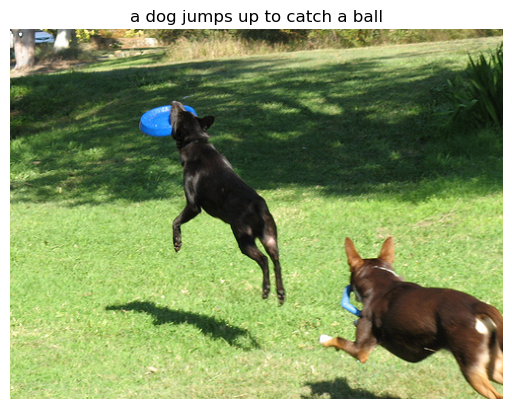

In [62]:
view_random_image()

In [63]:
def evaluate_model(model, val_content, word_to_index, max_len):
    bleu_scores = []
    i=0
    for imageID, cap_list in val_content.items():
        i+=1
        if(i==10):
          break

        image = 'FLICKER/Images/'+imageID+".jpg"
        image = encode_image(image)

        for caption in cap_list:
            reference = [word_to_index[word] for word in caption.split() if word in word_to_index]
            ref = [word for word in caption.split() if word in word_to_index]
            if len(reference) == 0:
                continue

            for i in range(1, len(reference)):
                xi = reference[0:i]
                yi = reference[i]

                xi = pad_sequences([xi], maxlen=max_len, value=0, padding='post')[0]
                pic = tf.squeeze(np.array([image]),[1])

                predicted_word_index = model.predict([[pic], np.array([xi])])[0].argmax()

                predicted_word = index_to_word[predicted_word_index]

                bleu = sentence_bleu([ref], predicted_word)
                bleu_scores.append(bleu)

    avg_bleu = sum(bleu_scores) / len(bleu_scores)
    return avg_bleu

In [64]:
blue_score = evaluate_model(model , content , word_to_index , 38)
blue_score

1/1 [==============================] - 0s 13ms/step


/Users/shreyachinamilli/anaconda3/envs/tf/lib/python3.9/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/shreyachinamilli/anaconda3/envs/tf/lib/python3.9/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/shreyachinamilli/anaconda3/envs/tf/lib/python3.9/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

1/1 [==============================] - 0s 13ms/step


6.315623410724001e-233

In [65]:
print(blue_score)

6.315623410724001e-233
